# Getting started with neuron simulations in Brian2

Installation of Brian is easily done via pip: 
http://brian2.readthedocs.org/en/2.0b4/introduction/install.html

Beginner tutorials are available in ipython notebook form:
1. http://brian2.readthedocs.org/en/2.0b4/resources/tutorials/1-intro-to-brian-neurons.html
2. http://brian2.readthedocs.org/en/2.0b4/resources/tutorials/2-intro-to-brian-synapses.html

Let's get started with importing Brian and defining matplotlib as inline plotting libary.

In [1]:
from brian2 import *
%matplotlib inline


# Single neuron
A neuron is defined by a differential equation, where in tau is needed to keep the units correct on both sides of the equation and ': 1' at the end of the line defines the unit. 

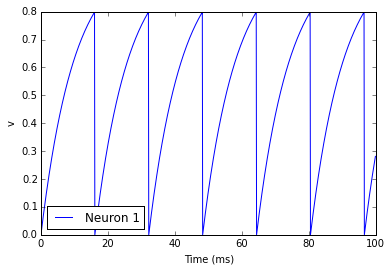

In [3]:
start_scope() # sort of a cealing/init statement to start the simulation clean from scratch 

tau = 10*ms
sigma = 0.5
eqs = '''dv/dt = (1-v)/tau : 1'''

# initialize the neuron with a threshold 0.8 resetting the voltage to 0
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0')
#G.v = 'rand()'

# initialize a state monitor to record what is happening with the neuron
M = StateMonitor(G, 'v', record=True)

run(100*ms)

# plot time vs voltage in a solit blue line with legend "Neuron 1"
plot(M.t/ms, M.v[0], '-b', label="Neuron 1")

xlabel('Time (ms)')
ylabel('v')
legend(loc='best')

Let's record the spike times

In [3]:
# add a spike monitor and let the simulation run for an extra 100 ms
spikemon = SpikeMonitor(G)
run(100*ms) 

# print all the recorded spikes
print('Spike times:', spikemon.t[:])

Spike times: [ 112.6  128.7  144.8  160.9  177.   193.1] ms


# Refractoriness
Let's add refractoriness. To do so we need to specify how long the refractory period is when initalizing the neuron group but furthermore we need add this change to the differential equation as well. To see what happens without the change to the differential equation just take '(unless refractory)' part away 


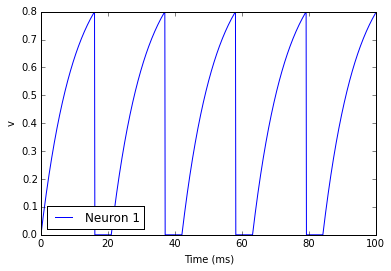

In [6]:
start_scope() 

tau = 10*ms
eqs = '''dv/dt = (1-v)/tau : 1 (unless refractory)''' ##!! added "unless refractory"

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms) ##!! added refractory period
M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], '-b', label="Neuron 1")

xlabel('Time (ms)')
ylabel('v')
legend(loc='best')

#Multipe neurons

Let's define a few neurons with random initial voltage.

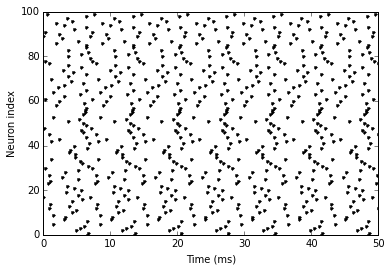

In [5]:
start_scope()

N = 100 # number of neurons
tau = 10*ms
eqs = '''dv/dt = (2-v)/tau : 1''' # why 2-v?

# initiate N neurons with random start voltage
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0')
G.v = 'rand()'

# add a spike monitor
spikemon = SpikeMonitor(G)

run(50*ms)

# spikemon.t = spike times
# spikemon.i = index of neuron
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')

#Stochasticity


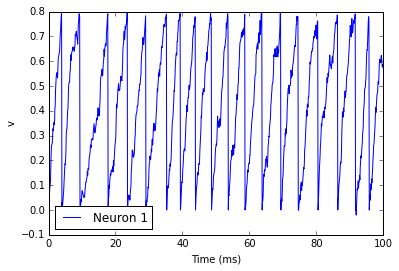

In [5]:
start_scope() # sort of a cealing/init statement to start the simulation clean from scratch 

tau = 10*ms
sigma = 0.2
eqs = '''dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1
v0 : 1''' 

# initialize the neuron with a threshold 0.8 resetting the voltage to 0
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0')
G.v0 = 2 # clamp to 2

# initialize a state monitor to record what is happening with the neuron
M = StateMonitor(G, 'v', record=True)

run(100*ms)

# plot time vs voltage in a solit blue line with legend "Neuron 1"
plot(M.t/ms, M.v[0], '-b', label="Neuron 1")

xlabel('Time (ms)')
ylabel('v')
legend(loc='best')

#A network example

Example taken from http://www.scholarpedia.org/article/Brian_simulator but addapted to run in brian2
 

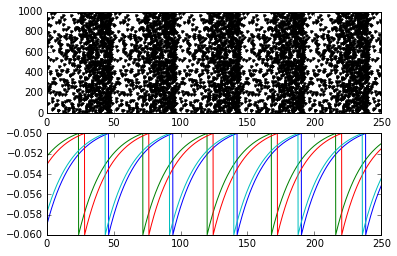

In [11]:
start_scope()
tau = 20*ms
eqs = """
dv/dt = (ge+gi-(v+49*mV))/tau : volt
dge/dt = -ge/(5*ms) : volt
dgi/dt = -gi/(10*ms) : volt
"""
P = NeuronGroup(1000, eqs, threshold='v>-50*mV', reset='v=-60*mV')
P.v = -60*mV+10*mV*rand(len(P))

Pe = P[:800] # take the first 3200 neurons 
Pi = P[800:] # take the last 800 neurons

# add connections
Ce = Synapses(Pe, P, 'weight:1')
Ci = Synapses(Pi, P, 'weight:1')

Ce.connect('i != j', p=0.02)
Ci.connect('i != j', p=0.02)
#Ce.weight = 'rand()'
#Ci.weight = 'j*-9'

spikemon = SpikeMonitor(P)
statemon = StateMonitor(P, 'v', record=range(4))

run(250*ms)

subplot(211)
plot(spikemon.t/ms, spikemon.i, '.k')

subplot(212)
plot(statemon.t/ms, statemon.v.T)

#Visualizing Connectivity 

Taken from Brian2 tutorial http://brian2.readthedocs.org/en/latest/resources/tutorials/2-intro-to-brian-synapses.html

In [2]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')


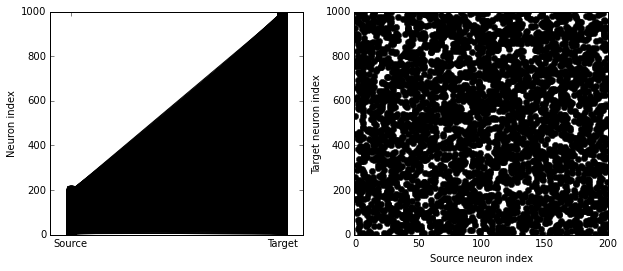

In [21]:
visualise_connectivity(Ce)
visualise_connectivity(Ci)

I don't understand the behavior of the connections and their probaility. So I am looking at the tutorial on connectivity now:

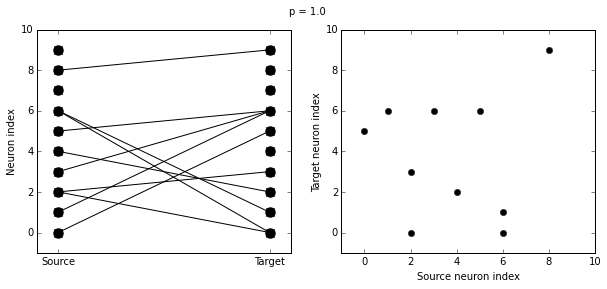

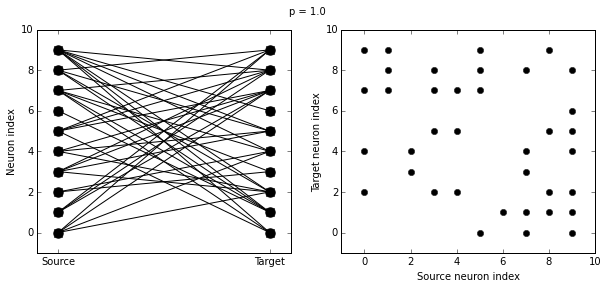

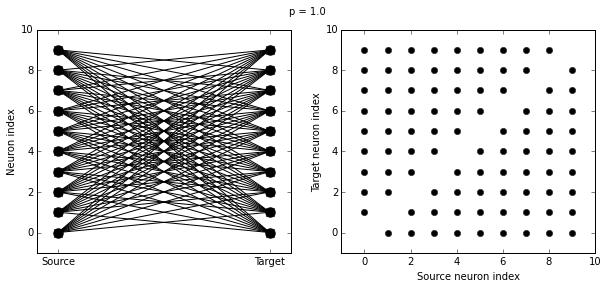

In [23]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

for prob in [0.1, 0.5, 1.0]:
    S = Synapses(G, G)
    S.connect('i!=j', p=prob)
    
    visualise_connectivity(S)
    suptitle('p = '+str(p))

#Small network of stochatic neurons
Let's combine the above insights into one piece of code to built a small network with stochastic neurons.

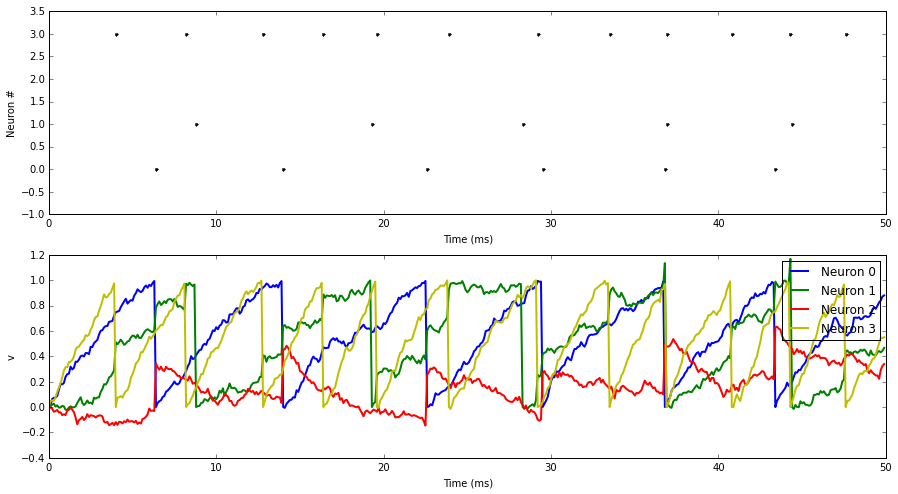

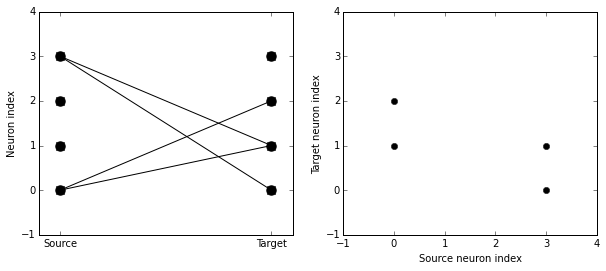

In [39]:
start_scope()
tau = 10*ms
sigma = 0.2

# simga * xi defines the stochasticity 
# *tau**-0.5 is needed for keeping the units correct 
eqs = '''
dv/dt = (I-v)/tau+sigma*xi*tau**-0.5  : 1
I : 1
'''

G = NeuronGroup(4, eqs, threshold='v>1', reset='v = 0')
G.I = [2, 1, 0, 3] # 2 # for all the same input
#G.tau = [10, 100, 100, 10]*ms

# Add synapses
S = Synapses(G, G, 'w : 1', pre='v_post += w')
S.connect(0, [1, 2])
S.connect(3, [1, 0])
S.w = 'j*0.2'

M = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(S)

runtime = 50
run(runtime*ms)

# Plot the spike times in a raster plot
subplot(211)
plot(spikemon.t/ms, spikemon.i, '.k')
axis([0, runtime, -1, 3.5])
xlabel('Time (ms)')
ylabel('Neuron #')

# Plot the voltage of all neurons along time
subplot(212)
plot(M.t/ms, M.v[0], '-b', lw=2, label='Neuron 0')
plot(M.t/ms, M.v[1], '-g', lw=2, label='Neuron 1')
plot(M.t/ms, M.v[2], '-r', lw=2, label='Neuron 2')
plot(M.t/ms, M.v[3], '-y', lw=2, label='Neuron 3')
axis([0, runtime, -0.4, 1.2])
xlabel('Time (ms)')
ylabel('v')
legend(loc='best')

# 
visualise_connectivity(S)

In [37]:
# zip spike times and neuron index to display them together
zipped = zip(spikemon.t[:], spikemon.i[:])
for item in zipped:
    print(item)

#print(spikemon.t)

(3.8 * msecond, 3)
(4. * msecond, 0)
(7.9 * msecond, 3)
(8. * msecond, 1)
(10.5 * msecond, 0)
(11.3 * msecond, 3)
(15.7 * msecond, 3)
(16.4 * msecond, 0)
(17.3 * msecond, 1)
(20.2 * msecond, 3)
(22.5 * msecond, 0)
(23.1 * msecond, 1)
(23.9 * msecond, 3)


# Bigger network
Let's do the same thing for a bigger network.


WARNING  brian2.groups.group.Group.resolve.resolution_conflict: Variable i is present in the namespace but is also an internal variable of synapses, the internal variable will be used.


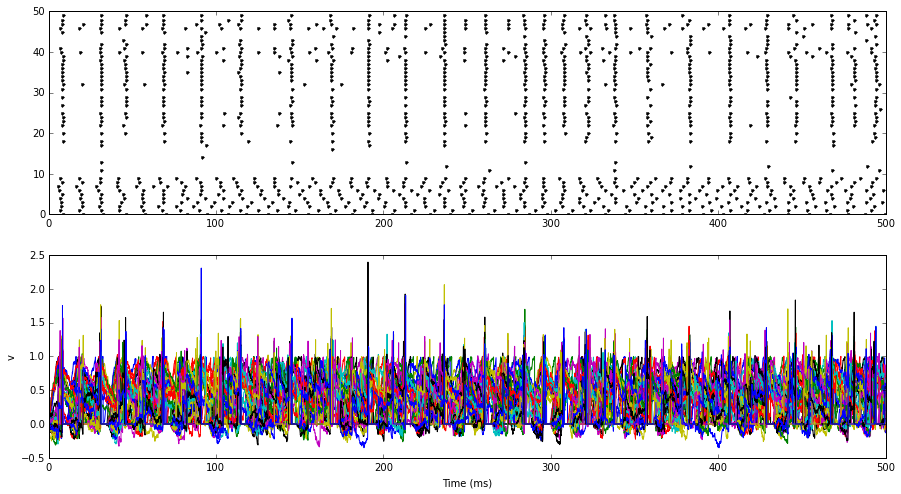

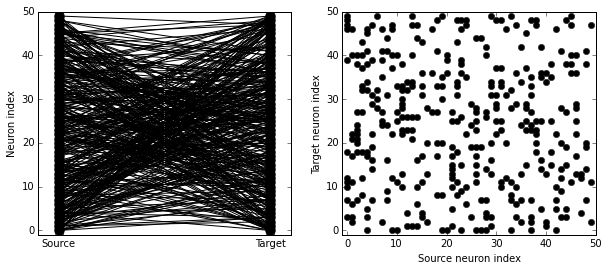

In [42]:
start_scope()
tau = 10*ms
sigma = 0.2

eqs = '''
dv/dt = (I-v)/tau+sigma*xi*tau**-0.5  : 1 (unless refractory)
I : 1 

'''
G = NeuronGroup(50, eqs, threshold='v>1', reset='v = 0', refractory=5*ms)
G.I = [2]*10 + [0]*40 # first 10 neurons are clamped to input 2
#G.tau = [10, 100, 100, 10]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', pre='v_post += w')
S.connect('i!=j', p=0.15)
          
S.w = 'j*0.01'

M = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(S)

run(500*ms)

matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
subplot(211)
plot(spikemon.t/ms, spikemon.i, '.k')

subplot(212)
plot(M.t/ms, M.v.T )
xlabel('Time (ms)')
ylabel('v')

visualise_connectivity(S)

Let's work on exporting the information


In [18]:
zipped = zip(spikemon.t[:], spikemon.i[:])
#print("Spikes: ", list(zipped))
#print(M.t[:], M.v[:])

for item in zipped:
    print(item)

(4.3 * msecond, 6)
(5.6 * msecond, 2)
(5.7 * msecond, 4)
(6.1 * msecond, 5)
(6.4 * msecond, 9)
(6.5 * msecond, 49)
(6.7 * msecond, 7)
(6.8 * msecond, 35)
(6.9 * msecond, 8)
(6.9 * msecond, 26)
(6.9 * msecond, 34)
(7. * msecond, 3)
(7.1 * msecond, 37)
(7.2 * msecond, 1)
(7.2 * msecond, 36)
(7.3 * msecond, 32)
(7.3 * msecond, 46)
(7.3 * msecond, 47)
(7.4 * msecond, 38)
(7.4 * msecond, 39)
(7.4 * msecond, 41)
(7.4 * msecond, 42)
(7.5 * msecond, 28)
(7.5 * msecond, 40)
(9.1 * msecond, 0)
(16.1 * msecond, 2)
(16.1 * msecond, 6)
(16.2 * msecond, 4)
(16.7 * msecond, 7)
(17.1 * msecond, 9)
(18. * msecond, 3)
(18.6 * msecond, 1)
(18.6 * msecond, 5)
(18.7 * msecond, 35)
(18.8 * msecond, 8)
(19.9 * msecond, 0)
(20. * msecond, 31)
(20. * msecond, 47)
(20. * msecond, 48)
(20.1 * msecond, 36)
(20.1 * msecond, 37)
(20.1 * msecond, 42)
(20.1 * msecond, 46)
(20.2 * msecond, 39)
(20.2 * msecond, 49)
(20.3 * msecond, 32)
(20.4 * msecond, 30)
(20.4 * msecond, 38)
(20.4 * msecond, 40)
(20.5 * msecond, 25)
